In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as tfl
import matplotlib.pyplot as plt
import os
import time
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


2022-09-12 13:27:09.454219: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-12 13:27:09.766998: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-12 13:27:10.675944: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/grey/anaconda3/envs/tf/lib/
2022-09-12 13:27:10.676016: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.s

Num GPUs Available:  1


2022-09-12 13:27:13.560041: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-12 13:27:13.580324: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-12 13:27:13.580519: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

print(train_images.shape)

(50000, 32, 32, 3)


In [3]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
# train_ds = tf.data.Dataset.from_tensor_slices((train_images[:10000], train_labels[:10000]))
# test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

2022-09-12 13:27:14.199177: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-12 13:27:14.200263: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-12 13:27:14.200483: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-12 13:27:14.200612: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

2022-09-12 13:27:15.198214: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 30720000 exceeds 10% of free system memory.


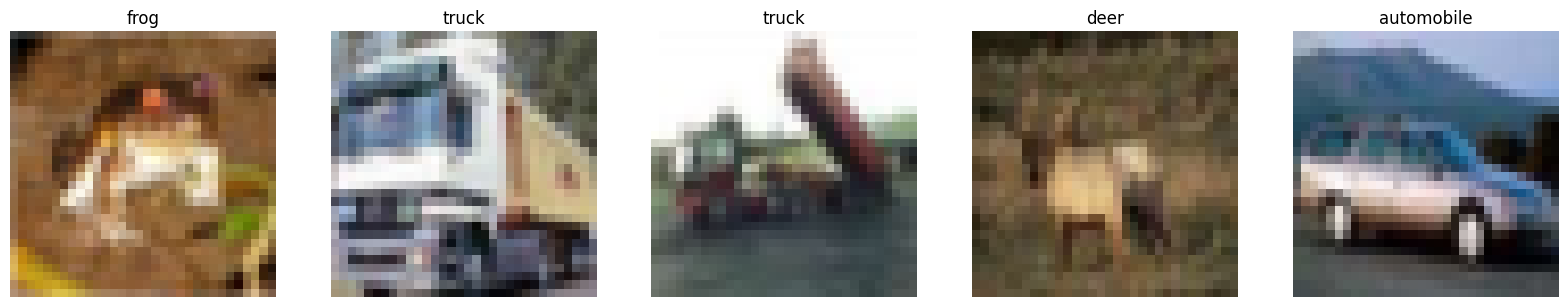

In [5]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(train_ds.take(5)):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

In [6]:
# def process_images(image, label):
#     image = tf.image.per_image_standardization(image)
#     image = tf.image.resize(image, (227,227))
#     return image, label

In [7]:
# train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
# test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
# print("Training data size:", train_ds_size)
# print("Test data size:", test_ds_size)

Training data size: 10000
Test data size: 10000


In [8]:
# train_ds = (train_ds.map(process_images).shuffle(buffer_size=train_ds_size).batch(batch_size=32, drop_remainder=True))
# test_ds = (test_ds.map(process_images).shuffle(buffer_size=train_ds_size).batch(batch_size=32, drop_remainder=True))

In [9]:
AlexNet = tf.keras.Sequential([
    tfl.Resizing(224,224),
    #Conv1
    tfl.Conv2D(96,11,strides=(4, 4),padding='valid', input_shape = (227,227,3)), 
    tfl.ReLU(),
    tfl.BatchNormalization(),
    tfl.MaxPool2D(pool_size = (3,3), strides = 2),
    #Conv2
    tfl.Conv2D(256,5,strides=(1, 1),padding='same'),
    tfl.ReLU(),
    tfl.BatchNormalization(),
    tfl.MaxPool2D(pool_size = (3,3), strides = 2),
    #Conv3
    tfl.Conv2D(384,3,strides=(1, 1),padding='same'),
    tfl.ReLU(),
    tfl.BatchNormalization(),
    #Conv4
    tfl.Conv2D(384,3,strides=(1, 1),padding='same'),
    tfl.ReLU(),
    tfl.BatchNormalization(),
    #Conv5
    tfl.Conv2D(256,3,strides=(1, 1),padding='same'),
    tfl.ReLU(),
    tfl.BatchNormalization(),
    tfl.MaxPool2D(pool_size = (3,3), strides = 2),
    #FC1
    tfl.Flatten(),
    tfl.Dense(4096, activation = 'relu'),
    tfl.Dropout(0.5),
    #FC2
    tfl.Dense(4096,activation = 'relu'),
    tfl.Dropout(0.5),
    #FC3
    tfl.Dense(10,activation = 'softmax')
    ])
AlexNet.compile( loss ='sparse_categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 re_lu (ReLU)                (None, 55, 55, 96)        0         
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 re_lu_1 (ReLU)              (None, 27, 27, 256)       0

In [10]:
history = AlexNet.fit(train_images, train_labels,epochs = 15, batch_size = 64, validation_data = (test_images, test_labels))

Epoch 1/10


2022-09-12 13:27:23.392348: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 30720000 exceeds 10% of free system memory.


: 

: 

In [ ]:
Results = AlexNet.evaluate(test_ds, batch_size=128)
print(Results)

312/312 [==============================] - 9s 20ms/step - loss: 1.5005 - accuracy: 0.7114
[1.5004923343658447, 0.7114382982254028]
